# Problem Set 1, due January 20, 2023 at 11:59pm 


#### Before You Start
For this problem set, you should download the flights.zip dataset from Canvas and the Ship data from our in-class lab. 

Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser. You should also make sure the following libraries load correctly and that you have the appropriate versions.

In [77]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.21.5 (need at least 1.7.1)
Your SciPy version:  1.9.1 (need at least 0.12.0)
Your Pandas version:  1.4.4 (need at least 0.11.0)
Your Mapltolib version:  3.5.2 (need at least 1.2.1)
Your Scikit-Learn version:  1.0.2 (need at least 0.13.1)


## Instructions: 

There are two parts to this Problem Set, with 6 questions in each part. 

**(1) Data Exploration** 

In the first part of the assignment, you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 

This data set uses the NYCFlights13 dataset. You can download the dataset from flights data that you downloaded from canvas (flights.zip).

Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

**(2) Cross Validation**

In the second part of the assignment, you will build off the lab that we started in class using the Ship data. The goal is to get you to understand cross validation, apply it with a simple linear regression and k-Nearest Neighbors problem, and then compare the methods.  

# Part I

In [78]:
import matplotlib.pyplot as plt

In [79]:
flights_df= pd.read_csv('flights.csv')

In [80]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [81]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [82]:
# Your code here
#flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1 = flights_df.loc[(flights_df['dest']=='SEA') & (flights_df['origin'].isin(['JFK', 'LGA', 'EWR'])) & (flights_df['year']==2013)]
flights_df1.shape[0]
flights_df1.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
78,79,2013,1,1,724.0,-1.0,1020.0,-10.0,AS,N594AS,11,EWR,SEA,338.0,2402,7.0,24.0
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
165,166,2013,1,1,857.0,6.0,1157.0,-25.0,UA,N45440,1670,EWR,SEA,343.0,2402,8.0,57.0
401,402,2013,1,1,1418.0,-1.0,1726.0,-6.0,UA,N37464,16,EWR,SEA,348.0,2402,14.0,18.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0
608,609,2013,1,1,1730.0,1.0,2039.0,-19.0,UA,N77296,1715,EWR,SEA,344.0,2402,17.0,30.0
644,645,2013,1,1,1808.0,-7.0,2111.0,-19.0,AS,N553AS,7,EWR,SEA,336.0,2402,18.0,8.0
656,657,2013,1,1,1824.0,-6.0,2203.0,-2.0,AA,N3ETAA,269,JFK,SEA,348.0,2422,18.0,24.0
660,661,2013,1,1,1826.0,-4.0,2154.0,-13.0,DL,N3772H,1643,JFK,SEA,334.0,2422,18.0,26.0
735,736,2013,1,1,1952.0,22.0,2257.0,6.0,UA,N76523,1416,EWR,SEA,342.0,2402,19.0,52.0


There were 3923 flights from NYC airports to Seattle in 2013

(b) How many airlines fly from NYC to Seattle?

In [83]:
# Your code here 
#flights_df2 = flights_df.loc[(flights_df['dest']=='SEA') & (flights_df['origin'].isin(['JFK', 'LGA', 'EWR']))]

airlines = len(pd.unique(flights_df1['carrier']))
airlines

5

There are 5 airlines that fly from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [84]:
# Your code here
#flights_df3 = flights_df.loc[(flights_df['dest']=='SEA') & (flights_df['origin'].isin(['JFK', 'LGA', 'EWR']))]

flights = len(pd.unique(flights_df1['tailnum']))
flights

936

There are 936 unique airplanes that fly from NYC to Seattle

(d) What is the average arrival delay for flights from NC to Seattle?

In [85]:
# Your code here
avg = flights_df1['arr_delay'].mean()
avg

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [86]:
# Your code here
# Method 1: Count of flights from each aiport divided by total count of flights
jfk1 = flights_df1[flights_df1['origin'] == 'JFK']
jfk_prop1 = jfk1.shape[0]/flights_df1.shape[0]
print(jfk_prop1)

lga1 = flights_df1[flights_df1['origin'] == 'LGA']
lga_prop1 = lga1.shape[0]/flights_df1.shape[0]
print(lga_prop1)

ewr1 = flights_df1[flights_df1['origin'] == 'EWR']
ewr_prop1 = ewr1.shape[0]/flights_df1.shape[0]
print(ewr_prop1)
#JFK1 = flights_df1[flights_df1['origin'] == 'JFK']


0.5332653581442773
0.0
0.46673464185572267


In [87]:
# Method 2: Using value_counts()
prop2 = flights_df1['origin'].value_counts(normalize=True) 
prop2

JFK    0.533265
EWR    0.466735
Name: origin, dtype: float64

In [88]:
# Method 3: Using groupby()
prop3 = (flights_df1.groupby('origin').size())/(flights_df1['origin'].count())
prop3

origin
EWR    0.466735
JFK    0.533265
dtype: float64

The proportion of flights to Seattle from each NYC airport are as follows:
EWR: 0.466735
JFK: 0.533265
LGA: 0.0

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [89]:
# Your code here
large_dep_delay = flights_df.groupby(['year', 'month', 'day']).agg({'dep_delay': 'mean'})
print (large_dep_delay.sort_values(by='dep_delay', ascending=False))

large_arr_delay = flights_df.groupby(['year', 'month', 'day']).agg({'arr_delay': 'mean'})
print (large_arr_delay.sort_values(by='arr_delay', ascending=False))

                dep_delay
year month day           
2013 3     8    83.536921
     7     1    56.233825
     9     2    53.029551
     7     10   52.860702
     12    5    52.327990
...                   ...
     9     5    -0.387797
           6    -0.397927
     11    9    -0.628852
     10    2    -0.919918
     9     24   -1.329832

[365 rows x 1 columns]
                arr_delay
year month day           
2013 3     8    85.862155
     6     13   63.753689
     7     22   62.763403
     5     23   61.970899
     7     10   59.626478
...                   ...
     9     5   -15.540373
           28  -16.371852
           6   -17.895010
     10    1   -18.959375
     9     7   -20.349854

[365 rows x 1 columns]


The date which has the largest average departure delay is 03/08/2013
The date which has the largest average arrival delay is 03/08/2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [90]:
# Your code here
worse_dep_delay = flights_df.sort_values(by='dep_delay', ascending=False).head(1)
worse_dep_delay

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0


The date which has the largest average arrival delay is 01/09/2013

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [91]:
# Your code here
winter = flights_df.loc[(flights_df['month'].isin([1, 2, 3]))]
#winter = flights_df.loc[(flights_df['month'].isin[1,2,3])]
print(winter['dep_delay'].describe())

spring = flights_df.loc[(flights_df['month'].isin([4, 5, 6]))]
print(spring['dep_delay'].describe())

summer = flights_df.loc[(flights_df['month'].isin([7, 8, 9]))]
print(summer['dep_delay'].describe())

autumn = flights_df.loc[(flights_df['month'].isin([10, 11, 12]))]
print(autumn['dep_delay'].describe())

count    78146.000000
mean        11.415210
std         37.760857
min        -33.000000
25%         -5.000000
50%         -2.000000
75%         10.000000
max       1301.000000
Name: dep_delay, dtype: float64
count    83129.000000
mean        15.878225
std         44.942818
min        -24.000000
25%         -5.000000
50%         -1.000000
75%         15.000000
max       1137.000000
Name: dep_delay, dtype: float64
count    84448.000000
mean        13.794974
std         42.758840
min        -26.000000
25%         -5.000000
50%         -1.000000
75%         11.000000
max       1014.000000
Name: dep_delay, dtype: float64
count    82798.000000
mean         9.363125
std         33.952901
min        -43.000000
25%         -5.000000
50%         -2.000000
75%          8.000000
max        896.000000
Name: dep_delay, dtype: float64


[Text(0.5, 1.0, 'dep_delay vs month')]

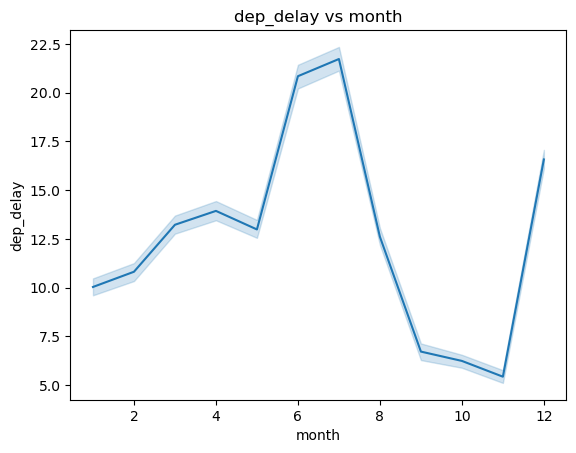

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

flights_df['date1'] = pd.to_datetime(dict(year=flights_df.year, month=flights_df.month, day=flights_df.day, hour=flights_df.day, minute=flights_df.minute))

sns.lineplot(data=flights_df, x="month", y="dep_delay").set(title='dep_delay vs month')


There are seasonal patterns for departure delays. The departure delay is the highest in months June and July. And the departure delay is the lowest in months September, October, and November.

(d) On average, how do departure delays vary over the course of a day?

[Text(0.5, 1.0, 'dep_delay vs hour')]

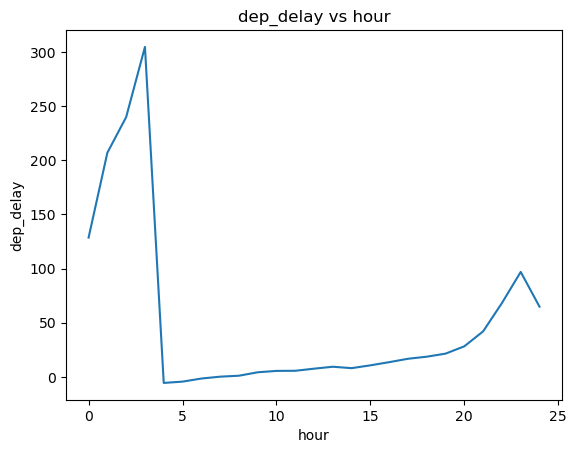

In [93]:
# Your code here
dep_delay_hourly = flights_df.groupby(['hour']).agg({'dep_delay':'mean'})
dep_delay_hourly

sns.lineplot(data=dep_delay_hourly, x="hour", y="dep_delay").set(title='dep_delay vs hour')

On an avaergae, the departure delays are maximum in the first 4 hours of the day i.e from 12am to 4am. 

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [94]:
# Your code here
flights_df['fastest'] = flights_df['distance']/flights_df['air_time']

fastest_flight = flights_df.sort_values(by='fastest', ascending=False).head(1)
fastest_flight

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date1,fastest
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-05-26 01:09:00,11.723077


The flight N666DN flew the fastest in 2013.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [95]:
# Your code here

# Dropping duplicates from original dataframe to remove multiple rows of same flight departing on the same day
flights_df2 = flights_df.drop_duplicates(['carrier', 'flight', 'dest', 'year', 'month', 'day'])

# Grouping the dataframe and counting
daily_flights = flights_df2.groupby(['carrier', 'flight', 'dest']).agg({'day':'count'})
print(daily_flights)

# Comparing count with 365, if count is equal to 365 then retrieving flight details
carrier_list = daily_flights[daily_flights['day'] == 365].index.tolist()
print(len(carrier_list))
print(carrier_list)


                     day
carrier flight dest     
9E      2900   BNA    59
        2901   BOS    55
        2902   BOS    55
        2903   BOS    29
               CLT    27
...                  ...
YV      3778   IAD     3
        3788   IAD    23
        3790   IAD     9
        3791   IAD    15
        3799   IAD     1

[11601 rows x 1 columns]
18
[('AA', 59, 'SFO'), ('AA', 119, 'LAX'), ('AA', 181, 'LAX'), ('AA', 1357, 'SJU'), ('AA', 1611, 'MIA'), ('B6', 219, 'CLT'), ('B6', 359, 'BUR'), ('B6', 371, 'FLL'), ('B6', 431, 'SRQ'), ('B6', 703, 'SJU'), ('B6', 1783, 'MCO'), ('DL', 2159, 'MCO'), ('DL', 2391, 'TPA'), ('EV', 5712, 'IAD'), ('UA', 15, 'HNL'), ('VX', 251, 'LAS'), ('VX', 407, 'LAX'), ('VX', 413, 'LAX')]


The are 18 flights that fly daily. They fly to the following destinations:
SFO, LAX, SJU, MIA, CLT, BUR, FLL, SRQ, MCO, TPA, IAD, HNL, LAS

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


[Text(0.5, 1.0, 'Proportion of flights having high delay times')]

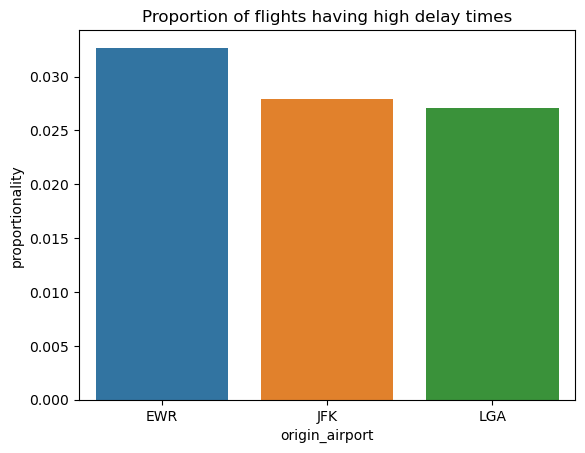

In [96]:
# Your code here

# Which Airport has high departure delay times and how frequently?
import seaborn as sns

#departure = flights_df.groupby(['origin'])
#print(departure)

high_dep_delay = pd.DataFrame()

EWR_data_filtered_all = flights_df.loc[(flights_df['origin']=='EWR')]
JFK_data_filtered_all = flights_df.loc[(flights_df['origin']=='JFK')]
LGA_data_filtered_all = flights_df.loc[(flights_df['origin']=='LGA')]

EWR_data_filtered = flights_df.loc[(flights_df['origin']=='EWR') & (flights_df['dep_delay'] >= 120)]
JFK_data_filtered = flights_df.loc[(flights_df['origin']=='JFK') & (flights_df['dep_delay'] >= 120)]
LGA_data_filtered = flights_df.loc[(flights_df['origin']=='LGA') & (flights_df['dep_delay'] >= 120)]

filtered = flights_df.loc[(flights_df['dep_delay'] >= 120)]
#EWR_data_filtered.shape

high_dep_delay['origin_airport'] = ['EWR','JFK','LGA']
high_dep_delay['high_delay_times'] = [EWR_data_filtered.shape[0], JFK_data_filtered.shape[0], LGA_data_filtered.shape[0]]
high_dep_delay['proportionality'] = [EWR_data_filtered.shape[0]/EWR_data_filtered_all.shape[0], JFK_data_filtered.shape[0]/JFK_data_filtered_all.shape[0], LGA_data_filtered.shape[0]/LGA_data_filtered_all.shape[0]]

#sns.barplot(data=high_dep_delay, x="origin_airport", y="high_delay_times")

sns.barplot(data=high_dep_delay, x="origin_airport", y="proportionality").set(title='Proportion of flights having high delay times')

#g=sns.countplot(data=EWR_data_filtered, x="month") 



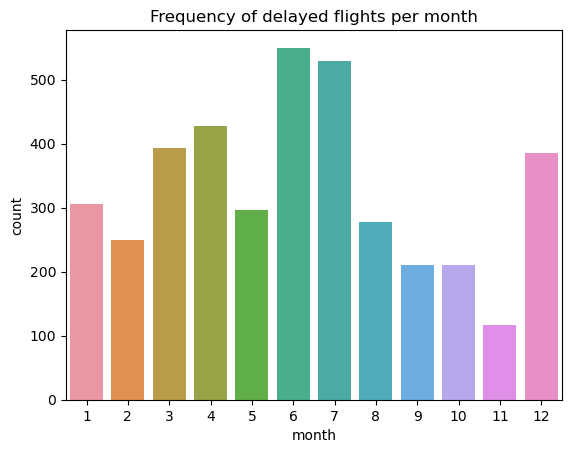

In [97]:
g=sns.countplot(data=EWR_data_filtered, x="month").set(title='Frequency of delayed flights per month')

Research Question: Which Airport has high departure delay times and how frequently?

Researching this question to find out which airport has high departure delay times and how frequently. This would be useful to the general public in flight bookings, when in a dilemma to choose the origin NYC airport. 

In the first visualization, I have produced a bar graph displaying the proportion of flights having high delay times (i.e >120). We can tell that EWR has had the most number of flight delays. 

In the second part of research, I wish to explore how frequently do these delays occur. This is to understand whether these delays occur only during a certain period of the year or throughout the year. If the former is true, then the passengers can avoid travelling via EWR in those months only instead of avoiding the airport entirely. To do so, I have produced a count plot which shows that flights are delayed by 2 hours (or more) very frequently. The count of delayed flights is least (relatively) in November and most (relatively) in June.


## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

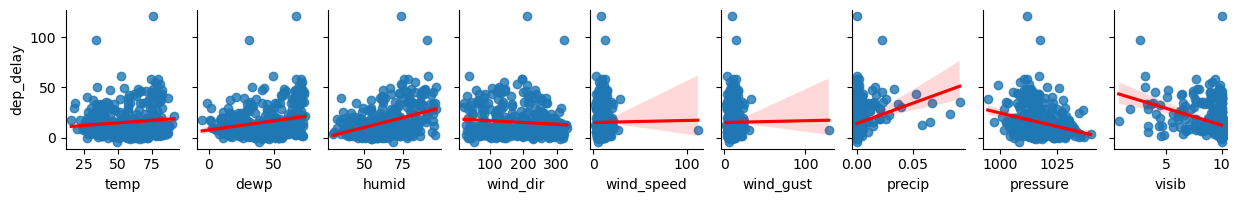

In [98]:
# Your code here
weather_df = pd.read_csv("weather.csv")
#print(weather_df.head(5))
#print(weather_df.describe())

merged = pd.merge(flights_df, weather_df, how="inner", on=["origin", "year", "month", "day", "hour"])
#print(left_merged.head(5))

columns = ["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"]

grouped = merged.groupby(["origin", "year", "month", "day"]).mean()

# Plotting the mean of dep_delay against mean of weather condition features 
sns.pairplot(data=grouped, x_vars=["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"], y_vars=["dep_delay"], height=2.0, aspect=0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


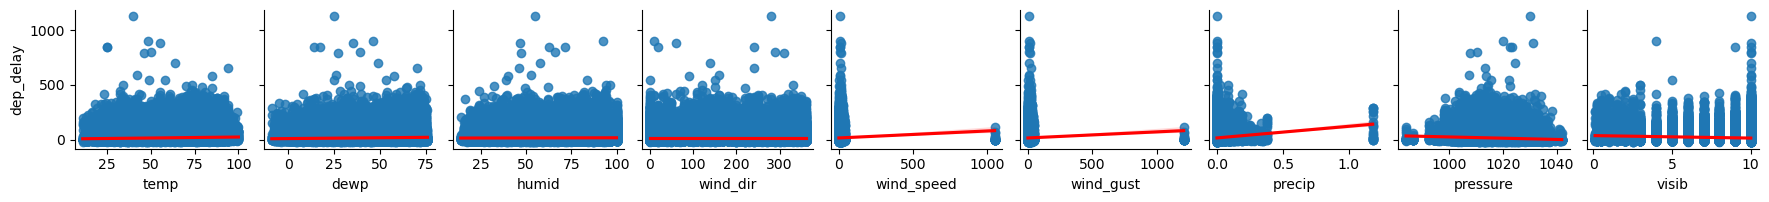

In [99]:
# Plotting all data point to show the association of weather this time with taking mean of features and output variable.
sns.pairplot(data=merged, x_vars=["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"] , y_vars=["dep_delay"], height=2.0, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


# Part II

Before we begin on the second part, you will need to download the libraries and Ship data noted in class.


In [100]:
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)

#### Read the data


In [101]:
df = pd.read_csv('./lab1_data.csv')
df.head()
#df.shape

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


#### Explore the data


In [102]:
# pick some columns for our practice
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


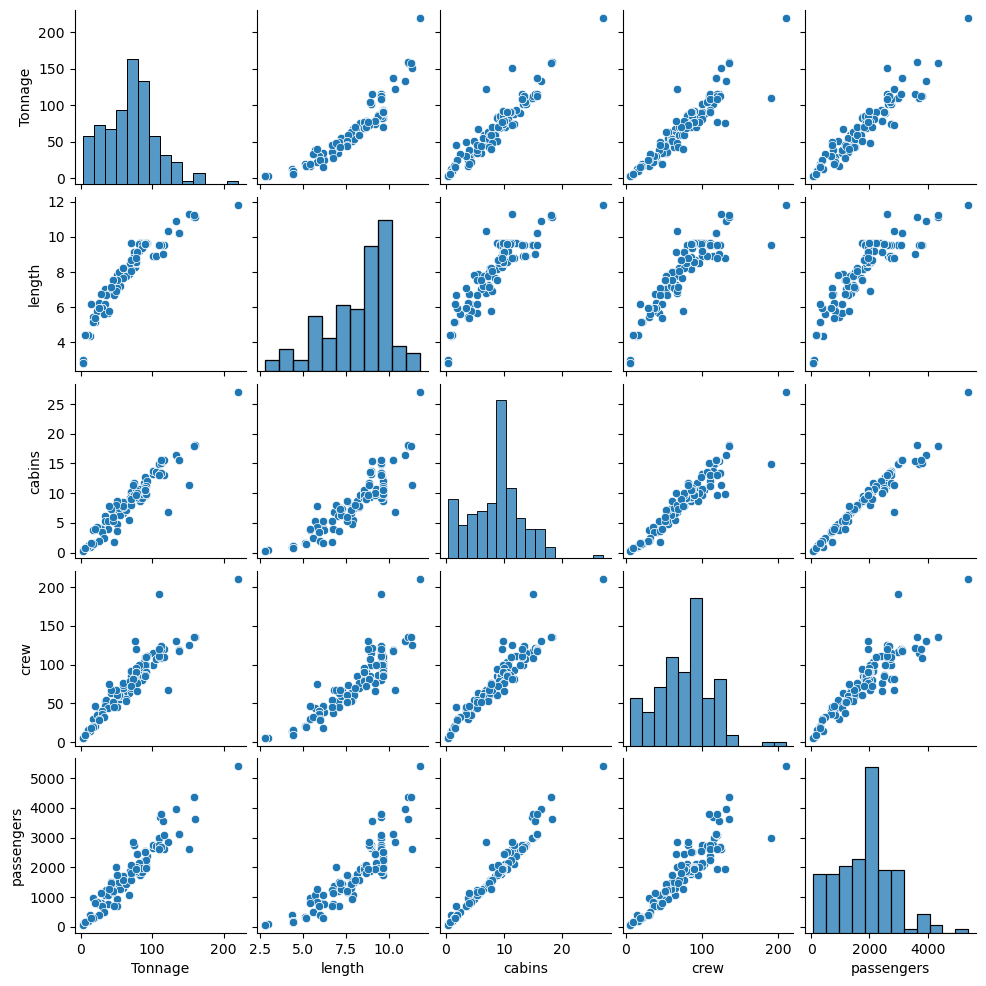

In [103]:
sns.pairplot(df_selected, height=2.0)

## Question 1 - What are your observations from this pair plot? 


My observations from this pairplot are as below:
1. All 5 variables are positively and strongly correlated to each other
2. Passenger variable is most strongly correlated to cabin as compared to other variables

## Prepare the data using cross validation


In [104]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [105]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [106]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


## Compare LR and KNN (k=3)


In [107]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

## Example of training linear regression model


In [108]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.769664874286


## Question 2: Following the example, training a KNN model (K=3). What do you find? Which model has better performance?


In [109]:
r2_knn_list = []
mse_knn_list = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # knn Model
    m_knn = knn.fit(X_train, y_train)
    y_pred = m_knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)
    
print("average R2 score for knn regression:", np.mean(r2_knn_list))
print("average MSE knn regression:", np.mean(mse_knn_list))

average R2 score for knn regression: 0.8844743932435826
average MSE knn regression: 104455.40707885305


From the above results, we can conclude that the linear regression model has a better performance. This is because it has a higher r2 value and a lower MSE value as compared to that of the KNN model.

## A short-cut to do cross-validation

List of available metrics found in scikit learn documentation: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [110]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [111]:
results_lr

{'fit_time': array([0.00176883, 0.00100303, 0.00122285, 0.00081801, 0.0007298 ]),
 'score_time': array([0.00089121, 0.00082397, 0.00068808, 0.00063205, 0.00060511]),
 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]),
 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]),
 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
        -21529.73771883]),
 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
        -40418.56065386])}

In [112]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.8844743932435826
average MSE linear regression: -41375.769664874286
average MSE for KNN: -104455.40707885305


In [113]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_results = df_results.append({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, ignore_index=True)

df_results

/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_21961/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_21961/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_21961/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_21961/2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results =

,k,train_error,test_error
0,1.0,0.707662,97386.466734
1,2.0,28913.530727,96072.199244
2,3.0,49546.975078,104455.407079
3,4.0,62332.373654,113585.888445
4,5.0,72862.633856,118121.459669
5,6.0,80881.137901,121470.921360
6,7.0,84954.388989,118872.146079
7,8.0,88831.092269,123161.196072
8,9.0,90639.171844,116838.024111
9,10.0,94161.930059,114674.361974


## Question 3: In the previous cell, you likely saw a deprecation error. Fix that error and rewrite the code below so that no error occurs. 

In [114]:
## New code here
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_new_row = pd.DataFrame({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, index = [k-1])
    
    df_results = pd.concat([df_results,df_new_row])
df_results

,k,train_error,test_error
0,1.0,0.707662,97386.466734
1,2.0,28913.530727,96072.199244
2,3.0,49546.975078,104455.407079
3,4.0,62332.373654,113585.888445
4,5.0,72862.633856,118121.459669
5,6.0,80881.137901,121470.921360
6,7.0,84954.388989,118872.146079
7,8.0,88831.092269,123161.196072
8,9.0,90639.171844,116838.024111
9,10.0,94161.930059,114674.361974


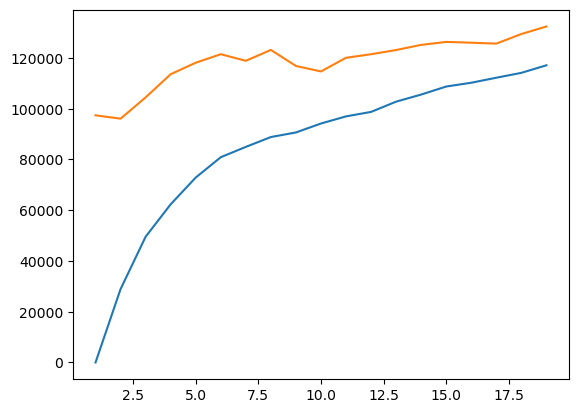

In [115]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])

In [116]:
scaler = preprocessing.StandardScaler()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

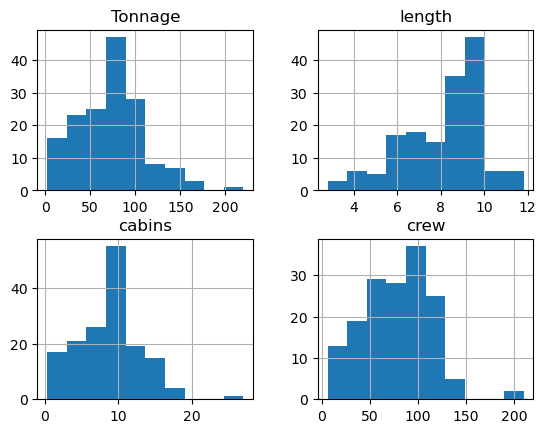

In [117]:
X_full.hist()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

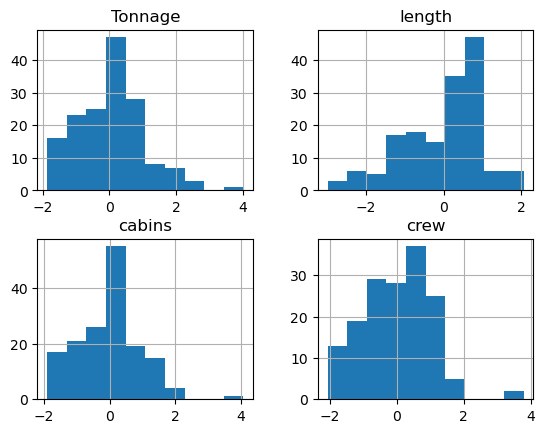

In [118]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

In [119]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

average R2 score: 0.9480419620768963
average MSE: 41375.769664874264
average R2 score: 0.9480419620768963
average MSE: 41375.769664874286


## Question 4: How does the results compared to the previous linear regression model without scaling? Why?

The results are the same as that of the previous liner regression model without scaling. In simple linear regression, scaling down only alters the input features and not the regression coefficients, which are essentially the parameters learned during modelling. Consequently, the fit is not affected by scaling. 

## Question 5: Following the example, train a KNN (K=3) model with the scaling.


In [120]:
r2_knn_list_scale = []
mse_knn_list_scale = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_knn)
    mse_knn_list_scale.append(mse_le_knn)
    
print("average R2 score:", np.mean(r2_knn_list_scale))
print("average MSE:", np.mean(mse_knn_list_scale))

print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))

average R2 score: 0.92885355932448
average MSE: 69669.86742831541
average R2 score: 0.8844743932435826
average MSE: 104455.40707885305


## Quesetion 6: How does the results compared to the previous KNN model without scaling? Why?

The results show that the performance of the KNN model improved after scaling. The value of r2 has increased and the value of MSE has decreased, which are both signs of better performance. 

KNN algorithm is based on the distance measures. There is a possibility of certain features having a relatively higher value as that compared to others. Features with larger scale have a more dominant impact on distance measures which leads to inaccurate results. Scaling is performed to ensure all features are transformed to a common scale such that they have an equal impact on the calculations. With the help of scaling, we are able to improve the model performance.
Consequently, in the above scenario, the model performance improved after scaling.
